# Différents mouvements présents dans la database.

Dans ce notebook, vous allez retrouver les différentes trajectoires que nous avons décider d'inclure dans la 
database. Vous retrouverez donc les mouvement rectiligne uniforme, le mouvement uniformément accélérré, le mouvement de Singer et le mouvement curviligne.

## Mouvement rectiligne uniforme (MRU)

#### Création des vecteurs (X,Y) comportant les positions et vitesses du système simulé

In [18]:
import numpy as np
from MRU_gen import MRU_gen
length= 100 #Nb d'echantillons
T = 1 # période d'échantillonage
x_0 = np.array([[0],[0]]) # Vecteur initial
n = 0.005 #Pour fixer q = n*9.81*T
X_MRU = MRU_gen(length,T,x_0,n)
Y_MRU = MRU_gen(length,T,x_0,n)

#### Affichage de la trajectoire 2D

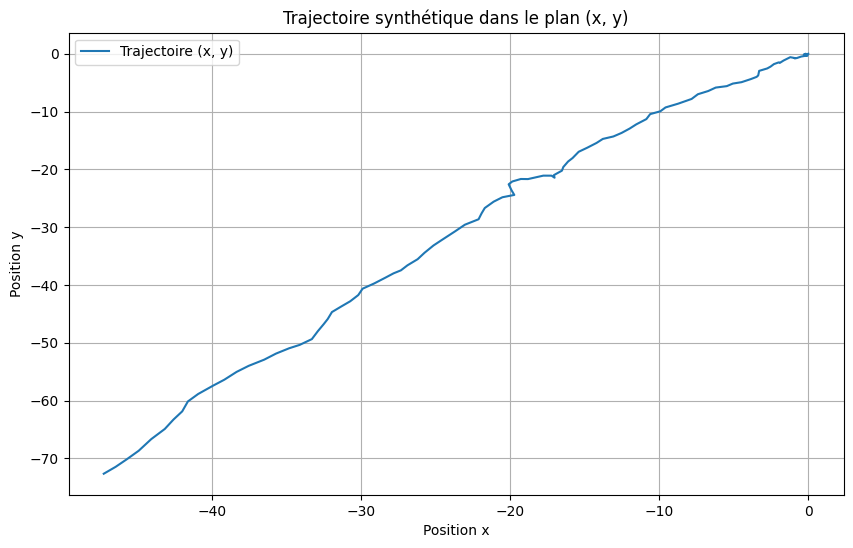

In [19]:
import matplotlib.pyplot as plt
x_coords_MRU = [xi[0, 0] for xi in X_MRU]
y_coords_MRU = [yi[0,0] for yi in Y_MRU]
plt.figure(figsize=(10, 6))
plt.plot(x_coords_MRU, y_coords_MRU, label='Trajectoire (x, y)')
plt.title('Trajectoire synthétique dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

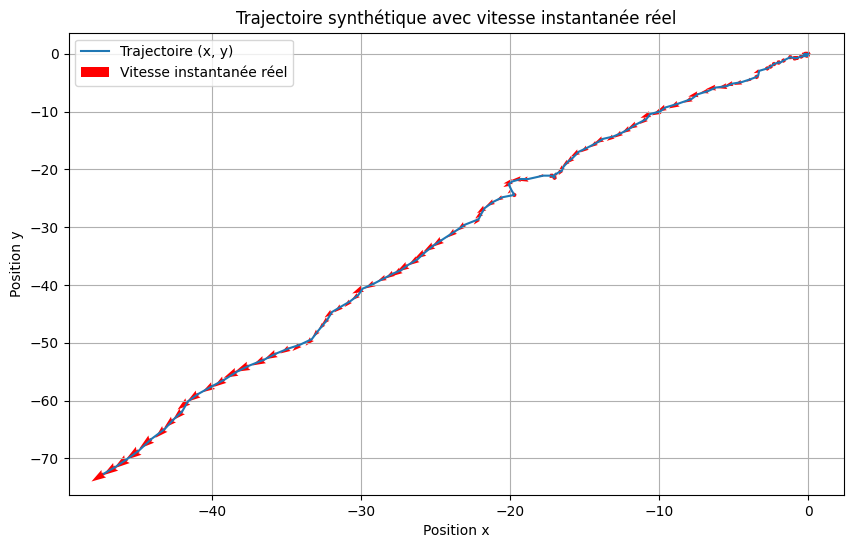

In [48]:
x_vits_MRU = [xi[1, 0] for xi in X_MRU]
y_vits_MRU = [yi[1,0] for yi in Y_MRU]
plt.figure(figsize=(10, 6))
plt.plot(x_coords_MRU, y_coords_MRU, label='Trajectoire (x, y)')
plt.quiver(x_coords_MRU, y_coords_MRU, x_vits_MRU, y_vits_MRU, angles='xy',scale_units='xy', scale=1, color='r', label='Vitesse instantanée réel')
plt.title('Trajectoire synthétique avec vitesse instantanée réel')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

## Mouvement uniformément accélérré (MUA)

#### Création des vecteurs (X,Y) comportant les positions et vitesses du système simulé

In [12]:
import numpy as np
from MUA_gen import MUA_gen
length= 100 #Nb d'echantillons
T = 1 # période d'échantillonage
x_0 = np.array([[0],[0],[0]]) # Vecteur initial
n = 0.005 #Pour fixer q = n*9.81*T
X_MUA = MUA_gen(length,T,x_0,n)
Y_MUA = MUA_gen(length,T,x_0,n)

#### Affichage de la trajectoire 2D

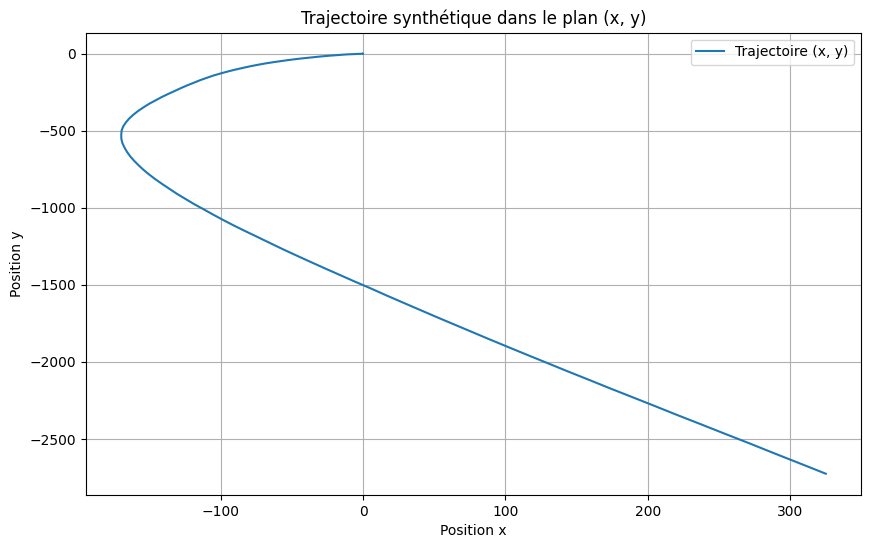

In [20]:
import matplotlib.pyplot as plt
x_coords_MUA = [xi[0, 0] for xi in X_MUA]
y_coords_MUA = [yi[0,0] for yi in Y_MUA]
plt.figure(figsize=(10, 6))
plt.plot(x_coords_MUA, y_coords_MUA, label='Trajectoire (x, y)')
plt.title('Trajectoire synthétique dans le plan (x, y)')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

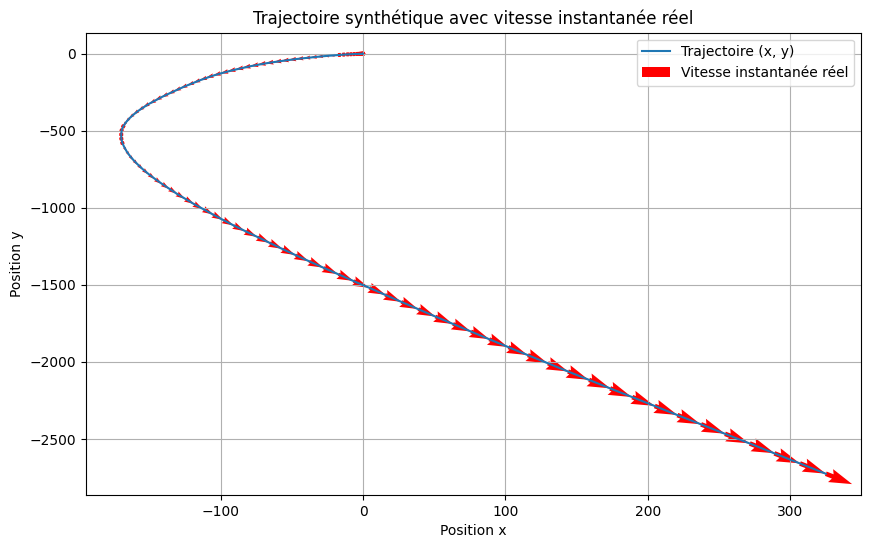

In [49]:
x_vits_MUA = [xi[1,0] for xi in X_MUA]
y_vits_MUA = [yi[1,0] for yi in Y_MUA]
plt.figure(figsize=(10, 6))
plt.plot(x_coords_MUA, y_coords_MUA, label='Trajectoire (x, y)')
plt.quiver(x_coords_MUA, y_coords_MUA, x_vits_MUA, y_vits_MUA, angles='xy',scale_units='xy', scale=1, color='r', label='Vitesse instantanée réel')
plt.title('Trajectoire synthétique avec vitesse instantanée réel')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)
plt.show()

## Représentations de l'autocorrélation des deux modèles

#### On va utilisé un estimateur de l'accélération pour le MRU et pour le MUA.Pour le MUA on va aussi représenter la différence entre l'estimateur et la vérité.

In [27]:
from MUA_gen import estimate
vit_est_x_MRU,acc_est_x_MRU = estimate(x_coords_MRU)
vit_est_y_MRU,acc_est_y_MRU = estimate(y_coords_MRU)
vit_est_x_MUA,acc_est_x_MUA = estimate(x_coords_MUA)
vit_est_y_MUA,acc_est_y_MUA = estimate(y_coords_MUA)
x_accs_MUA = [xi[2, 0] for xi in X_MUA]
y_accs_MUA = [yi[2, 0] for yi in Y_MUA]
correlation_x_MRU = np.correlate(acc_est_x_MRU, acc_est_x_MRU, mode='full')
correlation_y_MRU = np.correlate(acc_est_y_MRU, acc_est_y_MRU, mode='full')
lags_x_MRU = np.arange(-len(acc_est_x_MRU) + 1, len(acc_est_x_MRU))
lags_y_MRU = np.arange(-len(acc_est_y_MRU) + 1, len(acc_est_y_MRU))
correlation_x_MUA = np.correlate(acc_est_x_MUA, acc_est_x_MUA, mode='full')
correlation_y_MUA = np.correlate(acc_est_y_MUA, acc_est_y_MUA, mode='full')
lags_x_MUA = np.arange(-len(acc_est_x_MUA) + 1, len(acc_est_x_MUA))
lags_y_MUA = np.arange(-len(acc_est_y_MUA) + 1, len(acc_est_y_MUA))

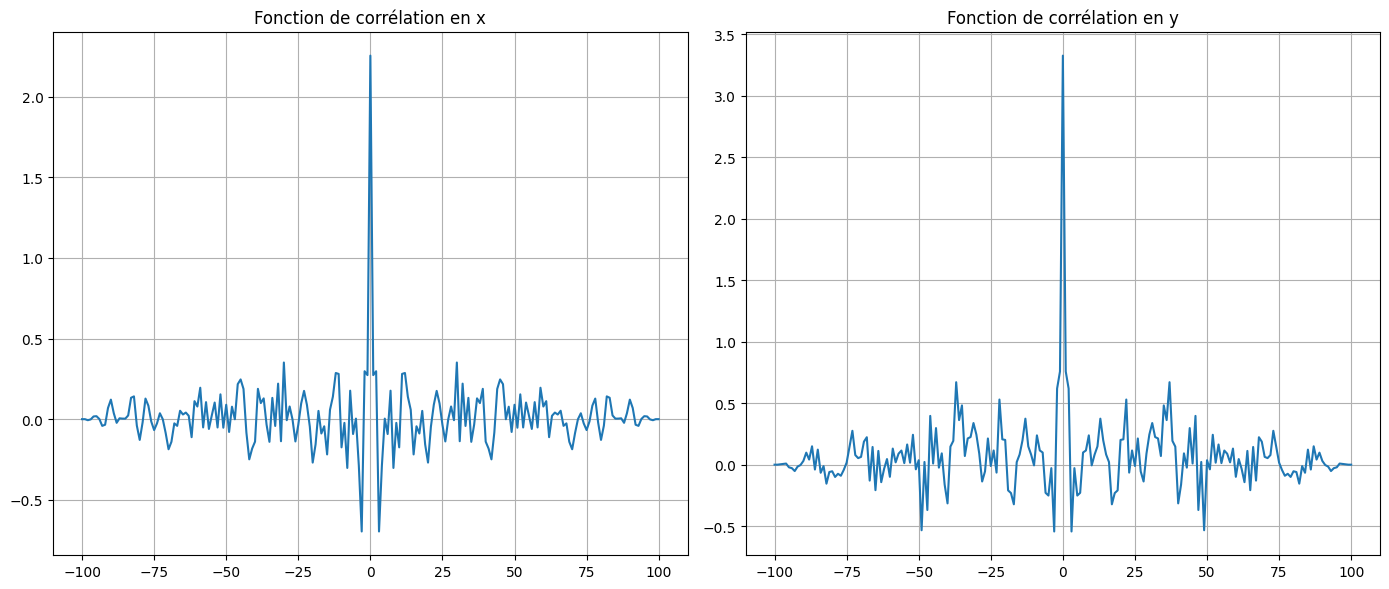

In [23]:


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lags_x_MRU, correlation_x_MRU)
plt.title("Fonction de corrélation en x")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(lags_y_MRU, correlation_y_MRU)
plt.title("Fonction de corrélation en y")
plt.grid()

# Display the combined plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


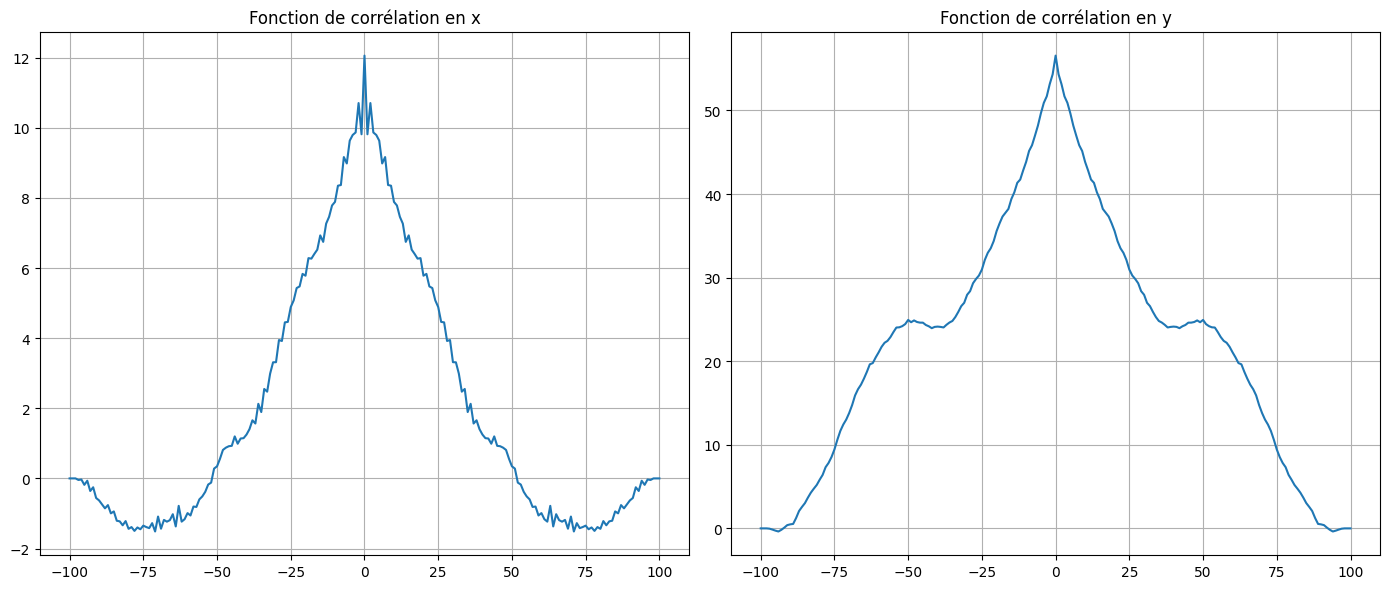

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lags_x_MUA, correlation_x_MUA)
plt.title("Fonction de corrélation en x")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(lags_y_MUA, correlation_y_MUA)
plt.title("Fonction de corrélation en y")
plt.grid()

# Display the combined plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


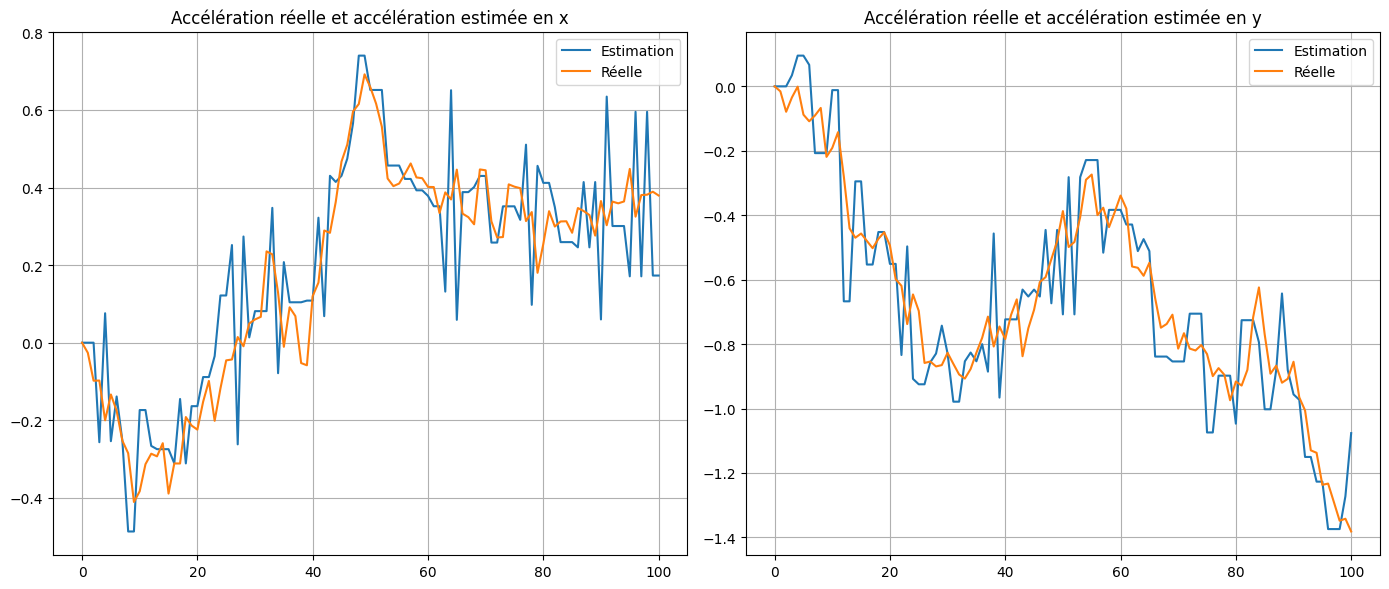

In [28]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(acc_est_x_MUA,label='Estimation')
plt.plot(x_accs_MUA,label='Réelle')
plt.legend()
plt.title("Accélération réelle et accélération estimée en x")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(acc_est_y_MUA,label='Estimation')
plt.plot(y_accs_MUA,label='Réelle')
plt.legend()
plt.title("Accélération réelle et accélération estimée en y")
plt.grid()

# Display the combined plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Mouvement de Singer

#### Création des vecteurs (X,Y) comportant les positions et vitesses du système simulé

In [33]:
import numpy as np
from Singer_gen import Singer_gen
length = 100
    
    

length = 100  #Nb d'echantillons
T = 1  # période d'échantillonage
x_0 = np.array([[0], [0], [0]])  # Vecteur initial
alpha_h=1000
alpha_b = 0.001
sigma_m = 1
X_Sin_h = Singer_gen(length, T, x_0,alpha_h,sigma_m)
Y_Sin_h = Singer_gen(length, T, x_0,alpha_h,sigma_m)
X_Sin_b = Singer_gen(length, T, x_0,alpha_b,sigma_m)
Y_Sin_b = Singer_gen(length, T, x_0,alpha_b,sigma_m)

[[-0.01039838]
 [-0.00429528]
 [ 0.13461296]]
[[-0.02980379]
 [-0.01580721]
 [-0.21134097]]
[[-0.04143578]
 [-0.0229705 ]
 [-0.17841402]]
[[-0.02465544]
 [-0.02908227]
 [-0.87748428]]
[[-0.02628042]
 [ 0.01517151]
 [ 0.5782887 ]]
[[-0.05119302]
 [ 0.05331971]
 [ 1.66184472]]
[[-0.0417041 ]
 [-0.11371498]
 [-2.06187749]]
[[-0.03057732]
 [ 0.00812776]
 [ 0.23686679]]
[[ 0.01506141]
 [-0.05213018]
 [-1.11333963]]
[[-0.0013368 ]
 [ 0.00044123]
 [ 0.13033285]]
[[-0.07459651]
 [-0.00084616]
 [ 0.39198214]]
[[-0.01168919]
 [ 0.00271028]
 [ 0.32918556]]
[[0.0435952 ]
 [0.0383214 ]
 [0.39765758]]
[[-0.02339566]
 [-0.05134597]
 [-1.00596547]]
[[0.03701394]
 [0.07689948]
 [0.95680275]]
[[0.02505062]
 [0.07364695]
 [1.04442697]]
[[0.0440126 ]
 [0.06069199]
 [1.06863752]]
[[-0.03170132]
 [ 0.01144009]
 [ 0.28284886]]
[[0.02964985]
 [0.02691235]
 [0.21762021]]
[[ 0.03092284]
 [-0.03407889]
 [-0.75122271]]
[[-0.02731972]
 [ 0.02408974]
 [ 0.26477342]]
[[-0.02771377]
 [ 0.00690524]
 [ 0.10206786]]
[[0

#### Affichage de la trajectoire 2D

<Figure size 1000x600 with 0 Axes>

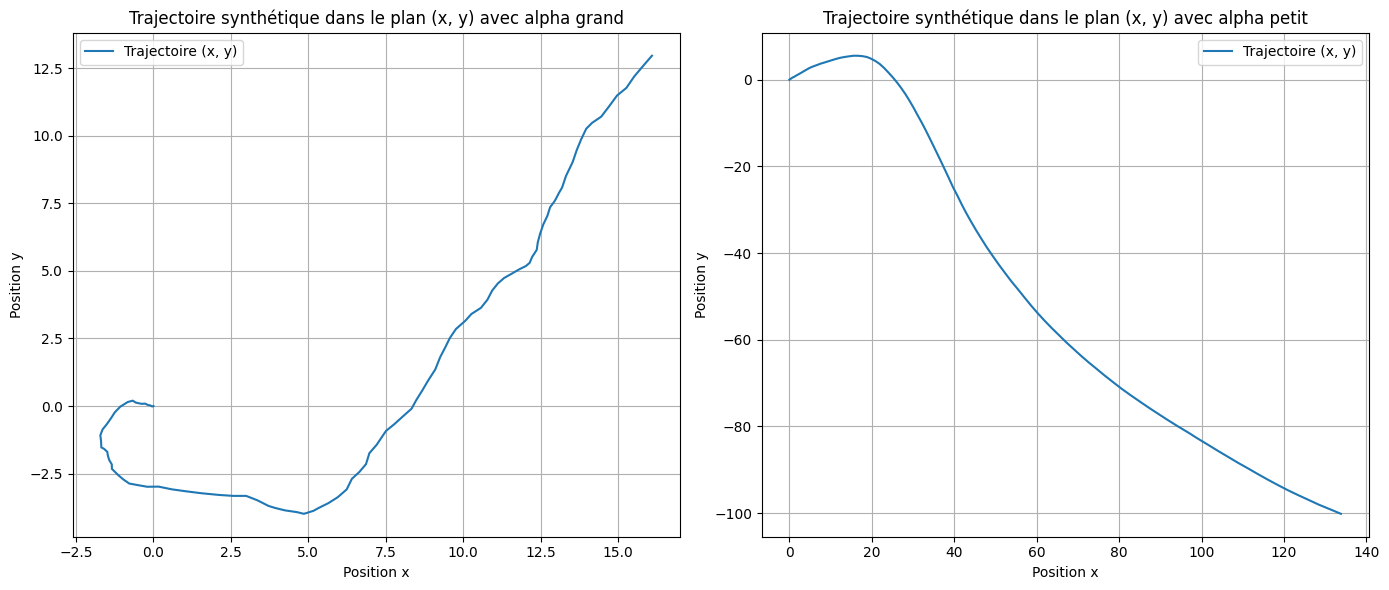

In [34]:
x_coords_Sin_h = [xi[0, 0] for xi in X_Sin_h]
y_coords_Sin_h = [yi[0, 0] for yi in Y_Sin_h]
x_coords_Sin_b = [xi[0, 0] for xi in X_Sin_b]
y_coords_Sin_b = [yi[0, 0] for yi in Y_Sin_b]

plt.figure(figsize=(10, 6))

plt.show()
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_coords_Sin_h, y_coords_Sin_h, label='Trajectoire (x, y)')
plt.title('Trajectoire synthétique dans le plan (x, y) avec alpha grand')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_coords_Sin_b, y_coords_Sin_b, label='Trajectoire (x, y)')
plt.title('Trajectoire synthétique dans le plan (x, y) avec alpha petit')
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.legend()
plt.grid(True)

# Display the combined plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### L'impact d'alpha dans le mouvement créé par le modèle de Singer est illustré ci-dessous


In [37]:
x_accs_Sin_h = [xi[2, 0] for xi in X_Sin_h]
y_accs_Sin_h = [yi[2, 0] for yi in Y_Sin_h]
x_accs_Sin_b = [xi[2, 0] for xi in X_Sin_b]
y_accs_Sin_b = [yi[2, 0] for yi in Y_Sin_b]

correlation_x_Sin_h = np.correlate(x_accs_Sin_h, x_accs_Sin_h, mode='full')
correlation_y_Sin_h = np.correlate(y_accs_Sin_h, y_accs_Sin_h, mode='full')
lags_x_Sin_h = np.arange(-len(x_accs_Sin_h) + 1, len(x_accs_Sin_h))
lags_y_Sin_h = np.arange(-len(y_accs_Sin_h) + 1, len(y_accs_Sin_h))
correlation_x_Sin_b = np.correlate(x_accs_Sin_b, x_accs_Sin_b, mode='full')
correlation_y_Sin_b = np.correlate(y_accs_Sin_b, y_accs_Sin_b, mode='full')
lags_x_Sin_b = np.arange(-len(x_accs_Sin_b) + 1, len(x_accs_Sin_b))
lags_y_Sin_b = np.arange(-len(y_accs_Sin_b) + 1, len(y_accs_Sin_b))

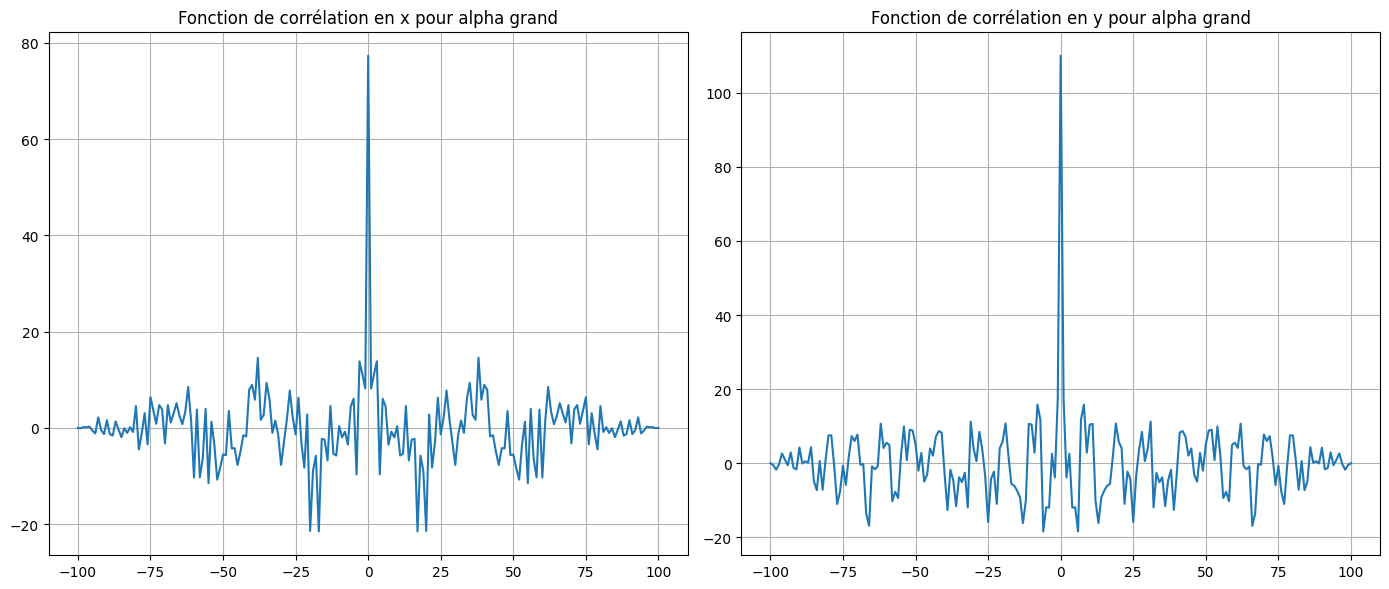

In [38]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lags_x_Sin_h, correlation_x_Sin_h)
plt.title("Fonction de corrélation en x pour alpha grand")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(lags_y_Sin_h, correlation_y_Sin_h)
plt.title("Fonction de corrélation en y pour alpha grand")
plt.grid()

# Display the combined plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

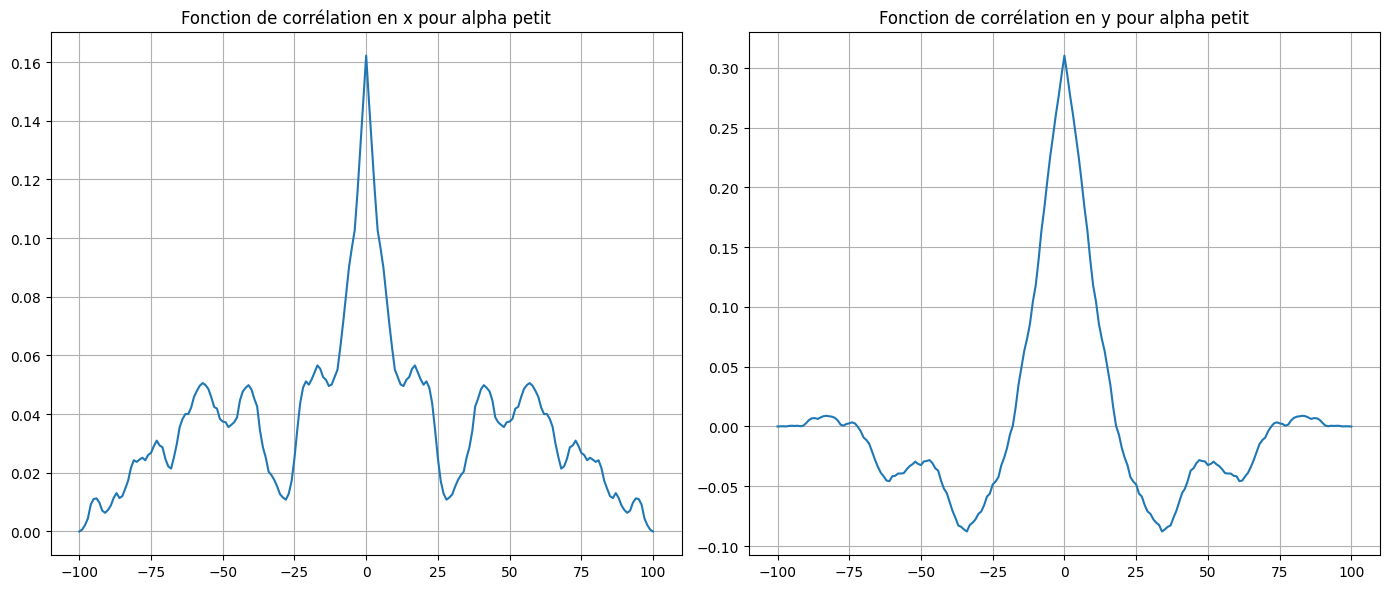

In [39]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lags_x_Sin_b, correlation_x_Sin_b)
plt.title("Fonction de corrélation en x pour alpha petit")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(lags_y_Sin_b, correlation_y_Sin_b)
plt.title("Fonction de corrélation en y pour alpha petit")
plt.grid()

# Display the combined plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Mouvements circulaires

J'ai pas les fonctions génératrices !!